# Experiment 1: Image Classification

## Librairies

In [2]:
import numpy as np
import torch
import pylab as pl
import pandas as pd
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from ModelImageClassification import Net

## Data

### MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype('float32')/255

### Fashion MNIST Dataset

In [3]:
(train_images_f, train_labels_f), (test_images_f, test_labels_f) = fashion_mnist.load_data()
train_images_f = train_images_f.reshape((60000, 28, 28))
train_images_f = train_images_f.astype('float32')/255
test_images_f = test_images_f.reshape((10000, 28, 28))
test_images_f = test_images_f.astype('float32')/255

### Preprocessing

In [3]:
N = 10000

# Data MNIST
X = torch.from_numpy(train_images[:N,]).float().view(N,1,28,28)
y = torch.from_numpy(train_labels[:N,]).float().to(torch.int64)
X_test = torch.from_numpy(test_images[:N,]).float().view(N,1,28,28)
y_test = torch.from_numpy(test_labels[:N,]).float().to(torch.int64)

# Data FASHION MNIST
Xf = torch.from_numpy(train_images_f[:N,]).float().view(N,1,28,28)
yf = torch.from_numpy(train_labels_f[:N,]).float().to(torch.int64)
Xf_test = torch.from_numpy(test_images_f[:N,]).float().view(N,1,28,28)
yf_test = torch.from_numpy(test_labels_f[:N,]).float().to(torch.int64)

## First Model : Convolutional Neural Network (CNN) - LeNet 5

In [21]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADAM', 'AMS', 'NADAM', 'ADAMAX']

In [7]:
# Some definitions
categorical_cross_entropy = torch.nn.CrossEntropyLoss()

nb_epochs = 50
batch_size = 120
batches_per_epoch = 40

alpha = 0.1
beta = 0.9
epsilon = 1e-8

gamma = 0.999 # RMS Prop

rho = 0.95 # AdaDelta


beta1 = 0.9   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.01

alpha2 = 0.001 # AMSGrad

## Performances of the Optimization Algorithms : MNIST Dataset

### Stochastic Gradient Descent (SGD)

In [8]:
model_ConvNN = Net()
L_sgd, A_sgd, Lt_sgd, At_sgd = model_ConvNN.training_SGD(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)
n = np.argmax(At_sgd)
lt_sgd, at_sgd = Lt_sgd[n].detach().item(), At_sgd[n].detach().item()

Launching SDG training of model
Number of parameters : 107786


Epoch 1 / 50 : Loss train = 2.294553756713867 |Accu train = 0.12300000339746475 | Loss test = 2.2950353622436523 |Accu test = 0.12269999831914902
Epoch 11 / 50 : Loss train = 0.22380764782428741 |Accu train = 0.9329000115394592 | Loss test = 0.24152009189128876 |Accu test = 0.9257000088691711
Epoch 21 / 50 : Loss train = 0.12069474160671234 |Accu train = 0.9602000117301941 | Loss test = 0.13862474262714386 |Accu test = 0.9528999924659729
Epoch 31 / 50 : Loss train = 0.08366625756025314 |Accu train = 0.9745000004768372 | Loss test = 0.1117766872048378 |Accu test = 0.9642000198364258
Epoch 41 / 50 : Loss train = 0.05616378039121628 |Accu train = 0.982699990272522 | Loss test = 0.09348545223474503 |Accu test = 0.9704999923706055


### Momentum (MOM)

In [9]:
model_ConvNN = Net()
L_mom, A_mom, Lt_mom, At_mom = model_ConvNN.training_Mom(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_mom)
lt_mom, at_mom = Lt_mom[n].detach().item(), At_mom[n].detach().item()

Launching Momentum training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.287541151046753 |Accu train = 0.1151999980211258 | Loss test = 2.2882723808288574 |Accu test = 0.11249999701976776
Epoch 11 / 50 : Loss train = 0.2227020561695099 |Accu train = 0.9358999729156494 | Loss test = 0.23621277511119843 |Accu test = 0.930899977684021
Epoch 21 / 50 : Loss train = 0.1253204494714737 |Accu train = 0.9617999792098999 | Loss test = 0.1382700353860855 |Accu test = 0.954800009727478
Epoch 31 / 50 : Loss train = 0.07570686936378479 |Accu train = 0.977400004863739 | Loss test = 0.09932432323694229 |Accu test = 0.9686999917030334
Epoch 41 / 50 : Loss train = 0.056042417883872986 |Accu train = 0.9836999773979187 | Loss test = 0.09332291036844254 |Accu test = 0.9713000059127808


### Nesterov Accelerated Gradient (NAG)

In [10]:
model_ConvNN = Net()
L_nag, A_nag, Lt_nag, At_nag = model_ConvNN.training_NAG(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_nag)
lt_nag, at_nag = Lt_nag[n].detach().item(), At_nag[n].detach().item()

Launching NAG training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.289659261703491 |Accu train = 0.10719999670982361 | Loss test = 2.290292978286743 |Accu test = 0.10300000011920929
Epoch 11 / 50 : Loss train = 0.21239055693149567 |Accu train = 0.9377999901771545 | Loss test = 0.22863876819610596 |Accu test = 0.9284999966621399
Epoch 21 / 50 : Loss train = 0.10972995311021805 |Accu train = 0.9675999879837036 | Loss test = 0.13667458295822144 |Accu test = 0.9570000171661377
Epoch 31 / 50 : Loss train = 0.07559844851493835 |Accu train = 0.9782000184059143 | Loss test = 0.10581623762845993 |Accu test = 0.965399980545044
Epoch 41 / 50 : Loss train = 0.0616295225918293 |Accu train = 0.9815999865531921 | Loss test = 0.11225169897079468 |Accu test = 0.9656999707221985


### AdaGrad

In [11]:
model_ConvNN = Net()
L_adg, A_adg, Lt_adg, At_adg = model_ConvNN.training_ADG(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)
n = np.argmax(At_adg)
lt_adg, at_adg = Lt_adg[n].detach().item(), At_adg[n].detach().item()

Launching Ada Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.263915538787842 |Accu train = 0.43309998512268066 | Loss test = 2.2645623683929443 |Accu test = 0.43320000171661377
Epoch 11 / 50 : Loss train = 0.17617380619049072 |Accu train = 0.947700023651123 | Loss test = 0.18885086476802826 |Accu test = 0.9431999921798706
Epoch 21 / 50 : Loss train = 0.10804671794176102 |Accu train = 0.9659000039100647 | Loss test = 0.1286589652299881 |Accu test = 0.961899995803833
Epoch 31 / 50 : Loss train = 0.07763494551181793 |Accu train = 0.9771999716758728 | Loss test = 0.11198870837688446 |Accu test = 0.9653000235557556
Epoch 41 / 50 : Loss train = 0.05234832316637039 |Accu train = 0.984499990940094 | Loss test = 0.09720269590616226 |Accu test = 0.97079998254776


### RMS Prop

In [12]:
model_ConvNN = Net()
L_rms, A_rms, Lt_rms, At_rms = model_ConvNN.training_RMS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, gamma, epsilon, verbose=True)
n = np.argmax(At_rms)
lt_rms, at_rms = Lt_rms[n].detach().item(), At_rms[n].detach().item()

Launching RMS Prop training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.294490098953247 |Accu train = 0.09910000115633011 | Loss test = 2.2954373359680176 |Accu test = 0.10320000350475311
Epoch 11 / 50 : Loss train = 0.17949934303760529 |Accu train = 0.9456999897956848 | Loss test = 0.19843196868896484 |Accu test = 0.9376000165939331
Epoch 21 / 50 : Loss train = 0.09650939702987671 |Accu train = 0.9714000225067139 | Loss test = 0.11891486495733261 |Accu test = 0.9638000130653381
Epoch 31 / 50 : Loss train = 0.06603047996759415 |Accu train = 0.9807999730110168 | Loss test = 0.09225984662771225 |Accu test = 0.9689000248908997
Epoch 41 / 50 : Loss train = 0.03924264386296272 |Accu train = 0.9886000156402588 | Loss test = 0.07978159934282303 |Accu test = 0.9757000207901001


### Adam

In [13]:
model_ConvNN = Net()
L_adam, A_adam, Lt_adam, At_adam = model_ConvNN.training_ADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_adam)
lt_adam, at_adam = Lt_adam[n].detach().item(), At_adam[n].detach().item()

Launching Adam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.3539872169494629 |Accu train = 0.8999999761581421 | Loss test = 0.36339908838272095 |Accu test = 0.8950999975204468
Epoch 11 / 50 : Loss train = 0.07777635753154755 |Accu train = 0.9782000184059143 | Loss test = 0.10190480947494507 |Accu test = 0.9695000052452087
Epoch 21 / 50 : Loss train = 0.05426324903964996 |Accu train = 0.9850999712944031 | Loss test = 0.0951678603887558 |Accu test = 0.9728999733924866
Epoch 31 / 50 : Loss train = 0.044253021478652954 |Accu train = 0.9864000082015991 | Loss test = 0.08949689567089081 |Accu test = 0.9743000268936157
Epoch 41 / 50 : Loss train = 0.029331136494874954 |Accu train = 0.9908000230789185 | Loss test = 0.09049192070960999 |Accu test = 0.974399983882904


### AMS Grad

In [14]:
model_ConvNN = Net()
L_ams, A_ams, Lt_ams, At_ams = model_ConvNN.training_AMS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha2, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_ams)
lt_ams, at_ams = Lt_ams[n].detach().item(), At_ams[n].detach().item()

Launching AMS Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.34468844532966614 |Accu train = 0.8913999795913696 | Loss test = 0.351418673992157 |Accu test = 0.8884999752044678
Epoch 11 / 50 : Loss train = 0.052117034792900085 |Accu train = 0.9843999743461609 | Loss test = 0.08182328939437866 |Accu test = 0.9742000102996826
Epoch 21 / 50 : Loss train = 0.030429229140281677 |Accu train = 0.991100013256073 | Loss test = 0.07241419702768326 |Accu test = 0.9794999957084656
Epoch 31 / 50 : Loss train = 0.015675624832510948 |Accu train = 0.9957000017166138 | Loss test = 0.07324662804603577 |Accu test = 0.977400004863739
Epoch 41 / 50 : Loss train = 0.011171865276992321 |Accu train = 0.9968000054359436 | Loss test = 0.0757458508014679 |Accu test = 0.9797999858856201


### NADAM

In [15]:
model_ConvNN = Net()
L_nadam, A_nadam, Lt_nadam, At_nadam = model_ConvNN.training_NADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(At_nadam)
lt_nadam, at_nadam = Lt_nadam[n].detach().item(), At_nadam[n].detach().item()

Launching Nadam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.3501434326171875 |Accu train = 0.8992999792098999 | Loss test = 0.3758828043937683 |Accu test = 0.8892999887466431
Epoch 11 / 50 : Loss train = 0.05256802961230278 |Accu train = 0.9843000173568726 | Loss test = 0.08632872998714447 |Accu test = 0.9718999862670898
Epoch 21 / 50 : Loss train = 0.01817217469215393 |Accu train = 0.9945999979972839 | Loss test = 0.07769844681024551 |Accu test = 0.9789999723434448
Epoch 31 / 50 : Loss train = 0.006786144804209471 |Accu train = 0.9976999759674072 | Loss test = 0.08543809503316879 |Accu test = 0.9789999723434448
Epoch 41 / 50 : Loss train = 0.0033465903252363205 |Accu train = 0.9991999864578247 | Loss test = 0.10243690013885498 |Accu test = 0.9778000116348267


### ADAMAX

In [16]:
model_ConvNN = Net()
L_adamax, A_adamax, Lt_adamax, At_adamax = model_ConvNN.training_ADAMAX(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(At_adamax)
lt_adamax, at_adamax = Lt_adamax[n].detach().item(), At_adamax[n].detach().item()

Launching Adamax training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.5159502625465393 |Accu train = 0.85589998960495 | Loss test = 0.5213016867637634 |Accu test = 0.8499000072479248
Epoch 11 / 50 : Loss train = 0.06231827288866043 |Accu train = 0.9822999835014343 | Loss test = 0.08661066740751266 |Accu test = 0.9739000201225281
Epoch 21 / 50 : Loss train = 0.04154258966445923 |Accu train = 0.9876000285148621 | Loss test = 0.08314621448516846 |Accu test = 0.9754999876022339
Epoch 31 / 50 : Loss train = 0.026590758934617043 |Accu train = 0.9922999739646912 | Loss test = 0.07122238725423813 |Accu test = 0.9767000079154968
Epoch 41 / 50 : Loss train = 0.017538592219352722 |Accu train = 0.9955000281333923 | Loss test = 0.07323423773050308 |Accu test = 0.9789000153541565


## Plot Training 

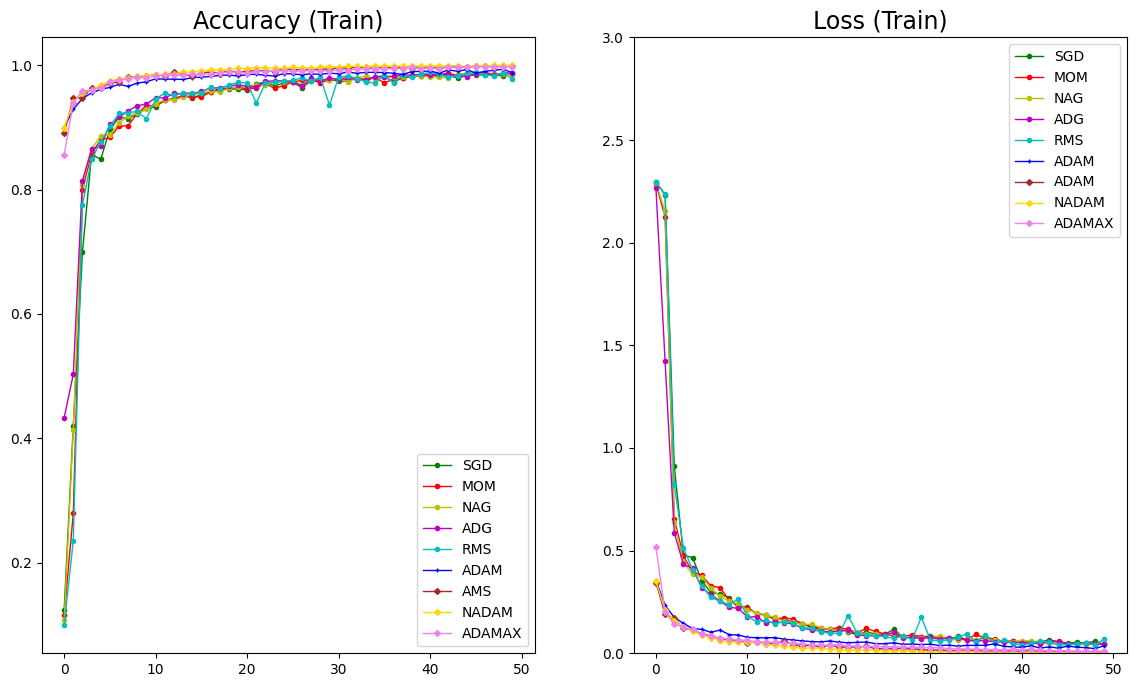

In [17]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,3)
ax[1].legend()

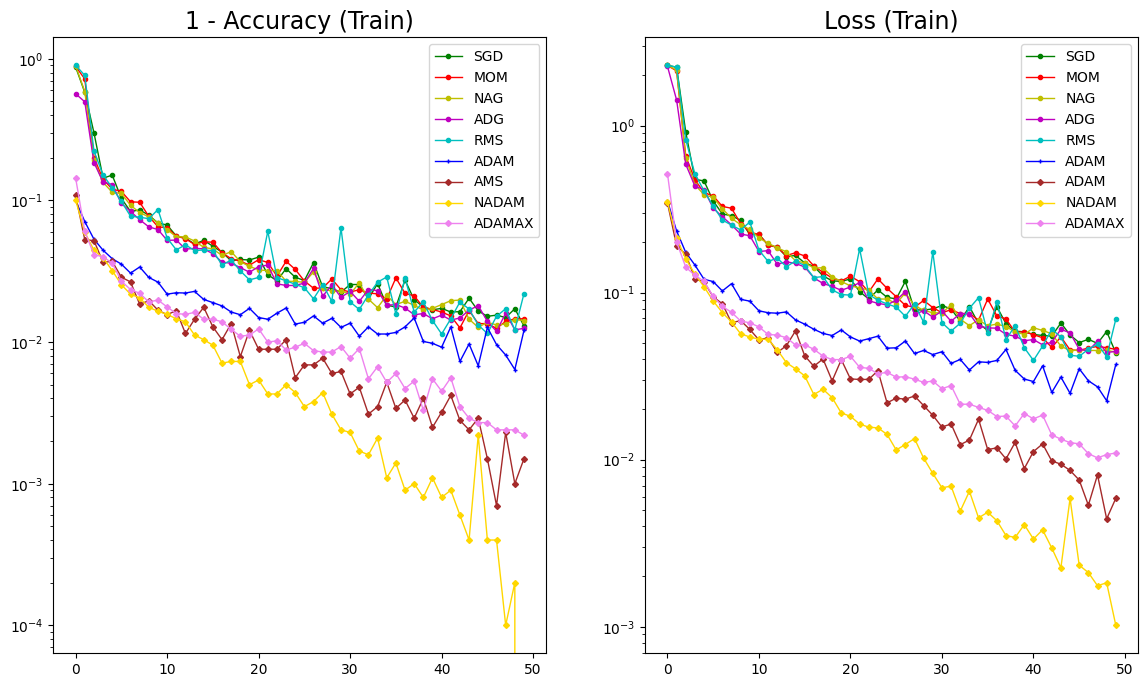

In [18]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [22]:
list_test_loss = [lt_sgd, lt_mom, lt_nag, lt_adg, lt_rms, lt_adam, lt_ams, lt_nadam, lt_adamax]
list_test_accu = [at_sgd, at_mom, at_nag, at_adg, at_rms, at_adam, at_ams, at_nadam, at_adamax]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,SGD,0.087097,0.9742
1,MOM,0.078002,0.9749
2,NAG,0.090995,0.9727
3,ADG,0.088148,0.9746
4,RMS,0.079782,0.9757
5,ADAM,0.085549,0.9787
6,AMS,0.073267,0.9815
7,NADAM,0.104709,0.9813
8,ADAMAX,0.076502,0.9798


## Performances of the Optimization Algorithms : Fashion MNIST Dataset

In [23]:
batches_per_epoch = 50

### Stochastic Gradient Descent (SGD)

In [ ]:
model_ConvNN = Net()
L_sgd_f, A_sgd_f, lt_sgd_f, at_sgd_f = model_ConvNN.training_SGD(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)

Launching SGD training of model 
 Number of parameters : 107786


Epoch 1 / 50 : Loss = 1.4567770957946777
Epoch 11 / 50 : Loss = 0.5208672285079956
Epoch 21 / 50 : Loss = 0.49370142817497253
Epoch 31 / 50 : Loss = 0.4118453562259674
Epoch 41 / 50 : Loss = 0.33281537890434265
Loss test = 0.4052102267742157, Accuracy test = 0.855400025844574


### Stochastic Momentum (MOM)

In [ ]:
model_ConvNN = Net()
L_mom_f, A_mom_f, lt_mom_f, at_mom_f = model_ConvNN.training_Mom(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)

Launching Momentum training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 1.6206737756729126
Epoch 11 / 50 : Loss = 0.5657704472541809
Epoch 21 / 50 : Loss = 0.4391767680644989
Epoch 31 / 50 : Loss = 0.3802649974822998
Epoch 41 / 50 : Loss = 0.3576401472091675
Loss test = 0.434739351272583, Accuracy test = 0.849399983882904


### Nesterov Accelerated Gradient (NAG)

In [ ]:
model_ConvNN = Net()
L_nag_f, A_nag_f, lt_nag_f, at_nag_f = model_ConvNN.training_NAG(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)

Launching NAG training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 1.056881308555603
Epoch 11 / 50 : Loss = 0.5273110866546631
Epoch 21 / 50 : Loss = 0.4207375943660736
Epoch 31 / 50 : Loss = 0.36612555384635925
Epoch 41 / 50 : Loss = 0.3277744948863983
Loss test = 0.4168642461299896, Accuracy test = 0.8574000000953674


### AdaGrad (ADG)

In [ ]:
model_ConvNN = Net()
L_adg_f, A_adg_f, lt_adg_f, at_adg_f = model_ConvNN.training_ADG(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)

Launching AdaGrad training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 2.289893865585327
Epoch 11 / 50 : Loss = 0.6470792293548584
Epoch 21 / 50 : Loss = 0.46232056617736816
Epoch 31 / 50 : Loss = 0.38425421714782715
Epoch 41 / 50 : Loss = 0.37430357933044434
Loss test = 0.4173599183559418, Accuracy test = 0.8537999987602234


### RMS Prop (RMS)

In [ ]:
model_ConvNN = Net()
L_rms_f, A_rms_f, lt_rms_f, at_rms_f = model_ConvNN.training_RMS(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, gamma, epsilon, verbose=True)

Launching RMSProp training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 2.275294542312622
Epoch 11 / 50 : Loss = 0.5366122722625732
Epoch 21 / 50 : Loss = 0.4307120740413666
Epoch 31 / 50 : Loss = 0.37625521421432495
Epoch 41 / 50 : Loss = 0.4385366141796112
Loss test = 0.44330698251724243, Accuracy test = 0.8374999761581421


### AdaDelta (ADD)

In [ ]:
model_ConvNN = Net()
L_add_f, A_add, lt_add_f, at_add_f = model_ConvNN.training_ADD(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, rho, 1e-6, verbose=True)

Launching Ada Delta training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 2.3019156455993652
Epoch 11 / 50 : Loss = 0.7100061774253845
Epoch 21 / 50 : Loss = 0.5968952775001526
Epoch 31 / 50 : Loss = 0.5675000548362732
Epoch 41 / 50 : Loss = 0.5416762232780457
Loss test = 0.5709338188171387, Accuracy test = 0.7870000004768372


### Adam 

In [ ]:
model_ConvNN = Net()
L_adam_f, A_adam_f, lt_adam_f, at_adam_f = model_ConvNN.training_ADAM(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)

Launching Ada Delta training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 0.8462098836898804
Epoch 11 / 50 : Loss = 0.3699739873409271
Epoch 21 / 50 : Loss = 0.32321956753730774
Epoch 31 / 50 : Loss = 0.32394498586654663
Epoch 41 / 50 : Loss = 0.2667143940925598
Loss test = 0.46187061071395874, Accuracy test = 0.8497999906539917


### AMS Grad

In [ ]:
model_ConvNN = Net()
L_ams_f, A_ams_f, lt_ams_f, at_ams_f = model_ConvNN.training_AMS(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha2, beta1, beta2, epsilon, verbose=True)

Launching AMS Grad training of model 
 Number of parameters : 107786


Epoch 1 / 50 : Loss = 0.6164660453796387
Epoch 11 / 50 : Loss = 0.3587062358856201
Epoch 21 / 50 : Loss = 0.2686714231967926
Epoch 31 / 50 : Loss = 0.22831928730010986
Epoch 41 / 50 : Loss = 0.20074768364429474
Loss test = 0.38476672768592834, Accuracy test = 0.8776000142097473


### NADAM

In [ ]:
model_ConvNN = Net()
L_nadam_f, A_nadam_f, lt_nadam_f, at_nadam_f = model_ConvNN.training_NADAM(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)

Launching AMS Grad training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 0.6519598364830017
Epoch 11 / 50 : Loss = 0.31756559014320374
Epoch 21 / 50 : Loss = 0.2603795528411865
Epoch 31 / 50 : Loss = 0.21858549118041992
Epoch 41 / 50 : Loss = 0.19476072490215302
Loss test = 0.40391626954078674, Accuracy test = 0.8769000172615051


### ADAMAX

In [ ]:
model_ConvNN = Net()
L_adamax_f, A_adamax_f, lt_adamax_f, at_adamax_f = model_ConvNN.training_ADAMAX(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)

Launching AMS Grad training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss = 0.7415346503257751
Epoch 11 / 50 : Loss = 0.358360230922699
Epoch 21 / 50 : Loss = 0.3014025390148163
Epoch 31 / 50 : Loss = 0.2645486295223236
Epoch 41 / 50 : Loss = 0.23749539256095886
Loss test = 0.36679789423942566, Accuracy test = 0.8791000247001648


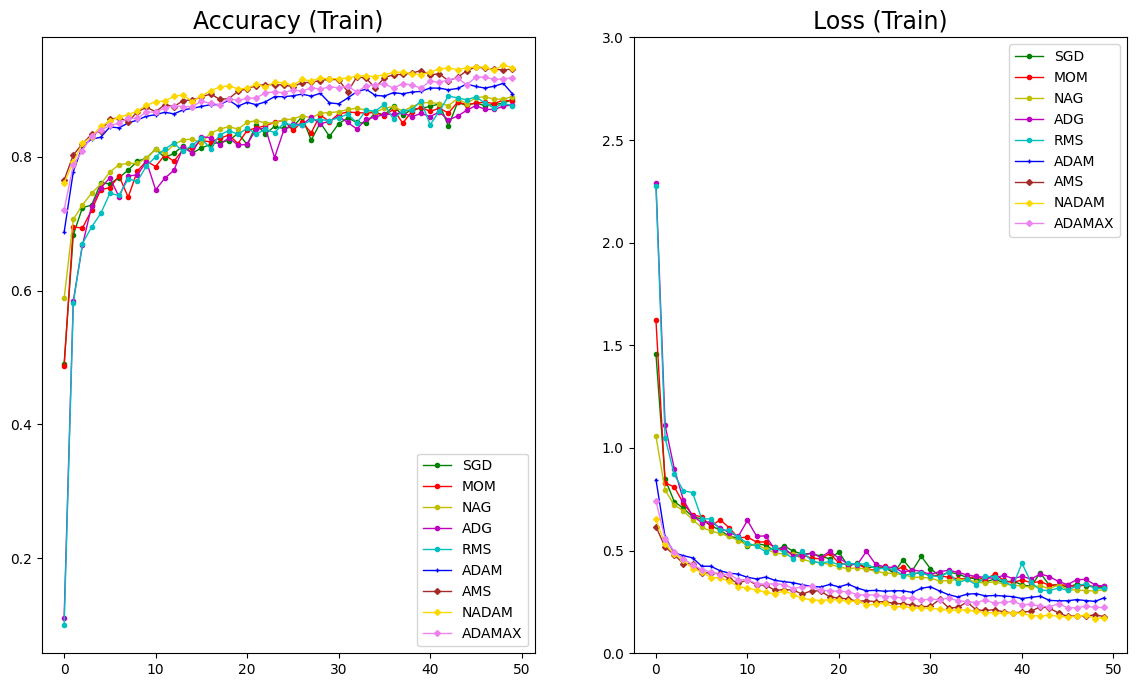

In [ ]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

#ax[0].plot(A_gd, 'bo-', markersize=3, linewidth=1, label='GD')
ax[0].plot(A_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

#ax[1].plot([v.detach().numpy() for v in L_gd], 'bo-', markersize=3, linewidth=1, label='GD')
ax[1].plot(L_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[1].plot(L_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,3)
ax[1].legend()

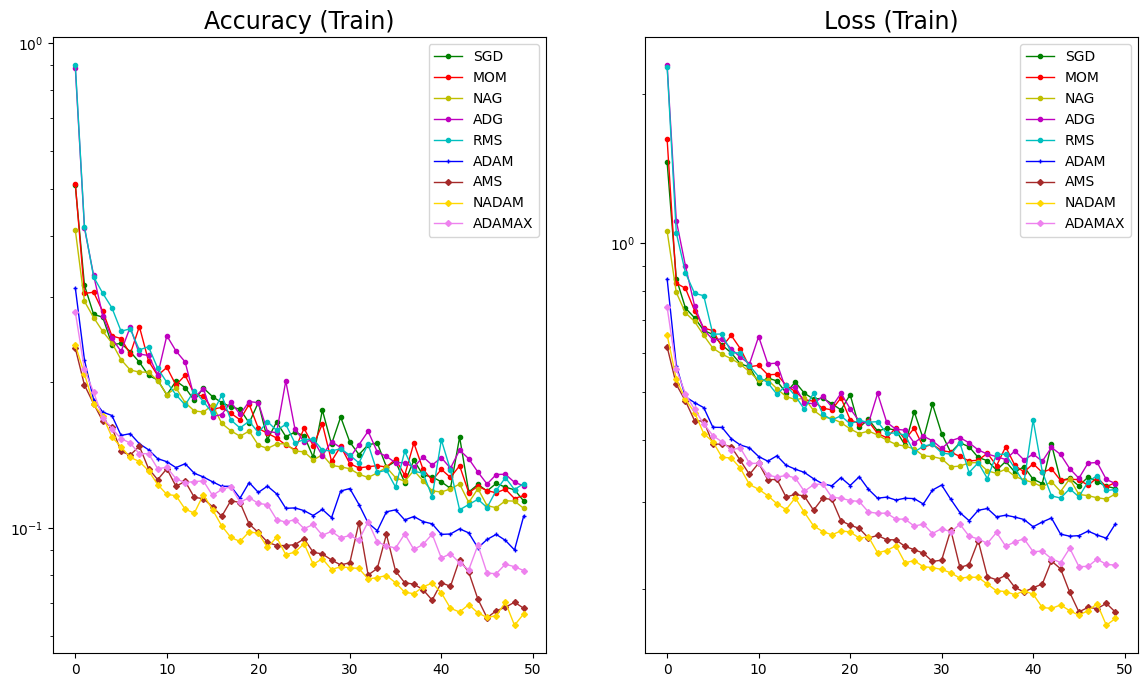

In [ ]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd_f), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom_f), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag_f), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg_f), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms_f), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam_f), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams_f), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam_f), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax_f), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[1].plot(L_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [ ]:
list_test_loss_f = [lt_sgd_f, lt_mom_f, lt_nag_f, lt_adg_f, lt_rms_f, lt_add_f, lt_adam_f, lt_ams_f, lt_nadam_f, lt_adamax_f]
list_test_accu_f = [at_sgd_f, at_mom_f, at_nag_f, at_adg_f, at_rms_f, at_add_f, at_adam_f, at_ams_f, at_nadam_f, at_adamax_f]
dico_f = {'Name':list_algo, 'Loss':list_test_loss_f, 'Accuracy':list_test_accu_f}
df_fashion_mnist = pd.DataFrame(dico_f)
df_fashion_mnist

,Name,Loss,Accuracy
0,SGD,0.405210,0.8554
1,MOM,0.434739,0.8494
2,NAG,0.416864,0.8574
3,ADG,0.417360,0.8538
4,RMS,0.443307,0.8375
5,ADD,0.570934,0.7870
6,ADAM,0.461871,0.8498
7,AMS,0.384767,0.8776
8,NADAM,0.403916,0.8769
9,ADAMAX,0.366798,0.8791
